In [123]:
# Profitability for genre/box office 


# Dependencies

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# Import data from .txt file

with open('movie_data.txt') as json_file:
    data = json.load(json_file)


In [155]:
genres = {}
genre_list = []

for year in list(data.keys()):
    movies = list(data[year].keys())
    genre_list = []
    for movie in movies[:30]:
        try:
            genre = data[year][movie]['Genre'].split(', ')
            for i in genre:
                genre_list.append(i)
        except Exception as e:
            print(str(e)+" Year: "+year+" Movie: "+movie)
    genres[year] = genre_list

In [161]:
#genre_df = pd.DataFrame(data = genre_count, columns = [i])
genre_df = {}
for i in list(genres.keys()):
    genre_df[i] = pd.Series(genres[i]).value_counts()
genre_df = pd.DataFrame(data = genre_df)
genre_df = genre_df.fillna(0)
genre_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Action,8.0,6.0,9.0,8.0,11.0,8.0,8.0,8.0,10.0,9.0,...,12.0,13.0,10.0,23.0,15.0,15.0,17.0,16.0,13.0,11.0
Adventure,7.0,7.0,6.0,8.0,8.0,11.0,6.0,5.0,7.0,7.0,...,19.0,18.0,16.0,20.0,19.0,20.0,18.0,17.0,18.0,8.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,...,9.0,7.0,6.0,5.0,7.0,8.0,5.0,6.0,7.0,2.0
Biography,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0
Comedy,13.0,16.0,16.0,13.0,15.0,17.0,20.0,17.0,17.0,19.0,...,14.0,13.0,12.0,7.0,12.0,12.0,10.0,10.0,10.0,11.0
Crime,6.0,5.0,3.0,6.0,2.0,4.0,4.0,8.0,10.0,7.0,...,3.0,2.0,6.0,3.0,1.0,3.0,3.0,3.0,4.0,3.0
Documentary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,12.0,7.0,9.0,15.0,11.0,13.0,11.0,9.0,10.0,10.0,...,5.0,7.0,4.0,6.0,6.0,5.0,9.0,5.0,11.0,13.0
Family,2.0,0.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,4.0,...,0.0,1.0,2.0,1.0,4.0,4.0,2.0,3.0,4.0,3.0
Fantasy,3.0,4.0,4.0,1.0,5.0,2.0,1.0,5.0,4.0,5.0,...,4.0,3.0,3.0,2.0,1.0,4.0,6.0,3.0,6.0,4.0


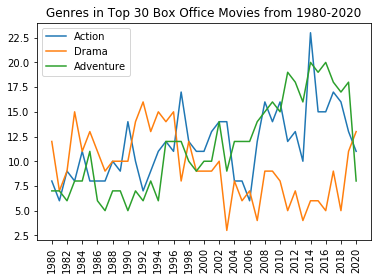

In [162]:
years = list(genres.keys())
genre_plot = ['Action','Drama','Adventure']
#markers = ['-', '--', '-.', ':']

for i in range(len(genre_plot)):
    plt.plot(years,genre_df.loc[genre_plot[i]],ls='-')

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.legend(genre_plot);
plt.title('Genres in Top 30 Box Office Movies from 1980-2020')
plt.show()

In [120]:
data['1980']
# if genre = 'action'
# then add box office value to 'action' total value, per year
# more meaningful data

year = '1980'
rating_values = {}



In [122]:
for movie in list(data[year].keys()):
    
    BO = data[year][movie]['BoxOffice']
    
    if data[year][movie]['Rated'] == 'PG':
        rating_values['PG'] = rating_values['PG'] + data[year][movie]['BoxOffice']

KeyError: 'PG'